In [1]:
using Images, LinearAlgebra, Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14752833973293323827\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7749146445219101820\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14752833973293323827\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

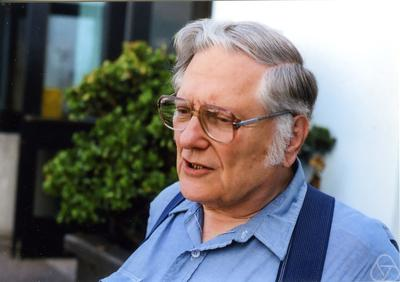

In [2]:
file = download("https://upload.wikimedia.org/wikipedia/commons/b/b1/William_Kahan.jpg")
img = load(file)

In [3]:
size(img)

(282, 400)

In [4]:
img[24,24]

In [5]:
dump(img[24,24])

RGB{Normed{UInt8,8}}
  r: Normed{UInt8,8}
    i: UInt8 0x1e
  g: Normed{UInt8,8}
    i: UInt8 0x25
  b: Normed{UInt8,8}
    i: UInt8 0x2d


In [6]:
typeof(img)

Array{RGB{Normed{UInt8,8}},2}

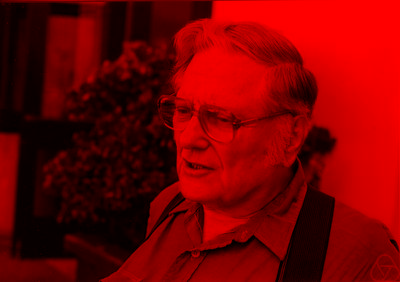

In [7]:
# red chanel of. the img
RGB.(red.(img), 0, 0)

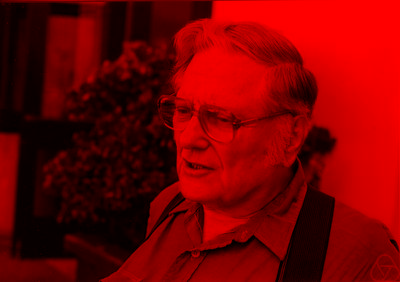

In [8]:
U, S, V = svd(red.(img))
RGB.(U * Diagonal(S) * V', 0, 0)

In [9]:
sum(length.((U, S, V)))

192606

In [10]:
length(img)

112800

So far, we're not doing any compression here — the sizes of U, S, and V are bigger than our original matrix! This is like the opposite of compression.

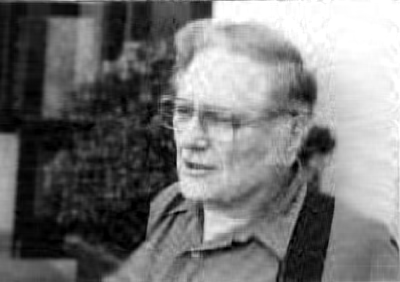

In [11]:
Gray.(U[:, 1:25] * Diagonal(S[1:25]) * V[:, 1:25]')

In [12]:
sum(length.((U[:, 1:25], S[1:25], V[:, 1:25])))/length(img)

0.15137411347517732

compressed by 85%

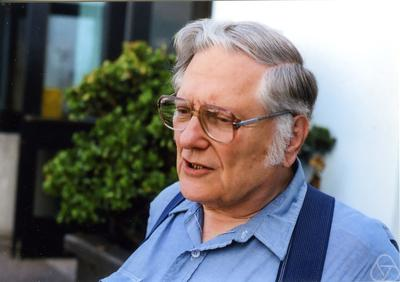

In [13]:
Ur, Sr, Vr = svd(red.(img))
Ug, Sg, Vg = svd(green.(img))
Ub, Sb, Vb = svd(blue.(img))
RGB.(Ur * Diagonal(Sr) * Vr', Ug * Diagonal(Sg) * Vg', Ub * Diagonal(Sb) * Vb')

In [14]:
function rank_approx(M, k)
    U, S, V = svd(M)
    
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    
    M = min.(max.(M, 0.0), 1.)
end


rank_approx (generic function with 1 method)

In [18]:
n = 100
@manipulate for k1 in 1:n, k2 in 1:n, k3 in 1:n
    RGB.(rank_approx(red.(img), k1),
         rank_approx(green.(img), k2),
         rank_approx(blue.(img), k3))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k1"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/rgupta98/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rgupta98/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rgupta98/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/rgupta98/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/rgupta98/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001120d4b50, Task (runnable) @0x00000001120d4b50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"

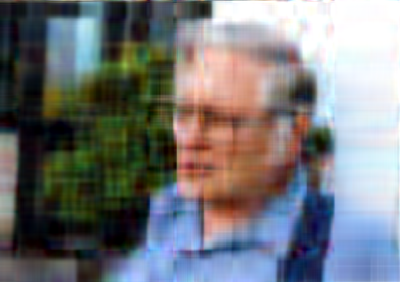

In [19]:
RGB.(rank_approx(red.(img), 10),
     rank_approx(green.(img), 10),
     rank_approx(blue.(img), 10))

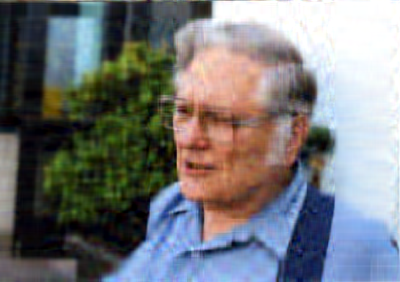

In [21]:
RGB.(rank_approx(red.(img), 20),
     rank_approx(green.(img), 20),
     rank_approx(blue.(img), 20))